In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
house_data = pd.read_csv("bengaluru_house_data.csv")

In [3]:
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
house_data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
house_data.shape

(13320, 9)

In [6]:
house_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
house_data.duplicated().sum()

529

In [8]:
house_data = house_data.drop_duplicates()

In [9]:
house_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [11]:
house_data.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [12]:
house_data['location'].fillna('Not Available', inplace=True)

In [13]:
house_data['society'].fillna('Not Available', inplace=True)

In [14]:
house_data.isnull().sum()

area_type         0
availability      0
location          0
size             16
society           0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [15]:
house_data = house_data.dropna()

In [16]:
house_data.shape

(12186, 9)

In [17]:
house_data.nunique()

area_type          4
availability      78
location        1266
size              27
society         2593
total_sqft      1976
bath              16
balcony            4
price           1924
dtype: int64

In [18]:
house_data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [19]:
house_data['area_type'].value_counts()

Super built-up  Area    8013
Built-up  Area          2290
Plot  Area              1801
Carpet  Area              82
Name: area_type, dtype: int64

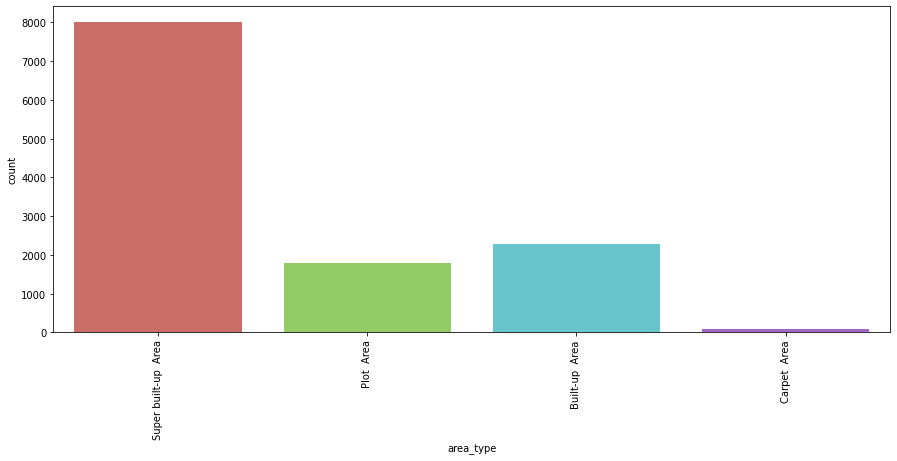

In [20]:
plt.figure(figsize=(15,6))
sns.countplot('area_type', data = house_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

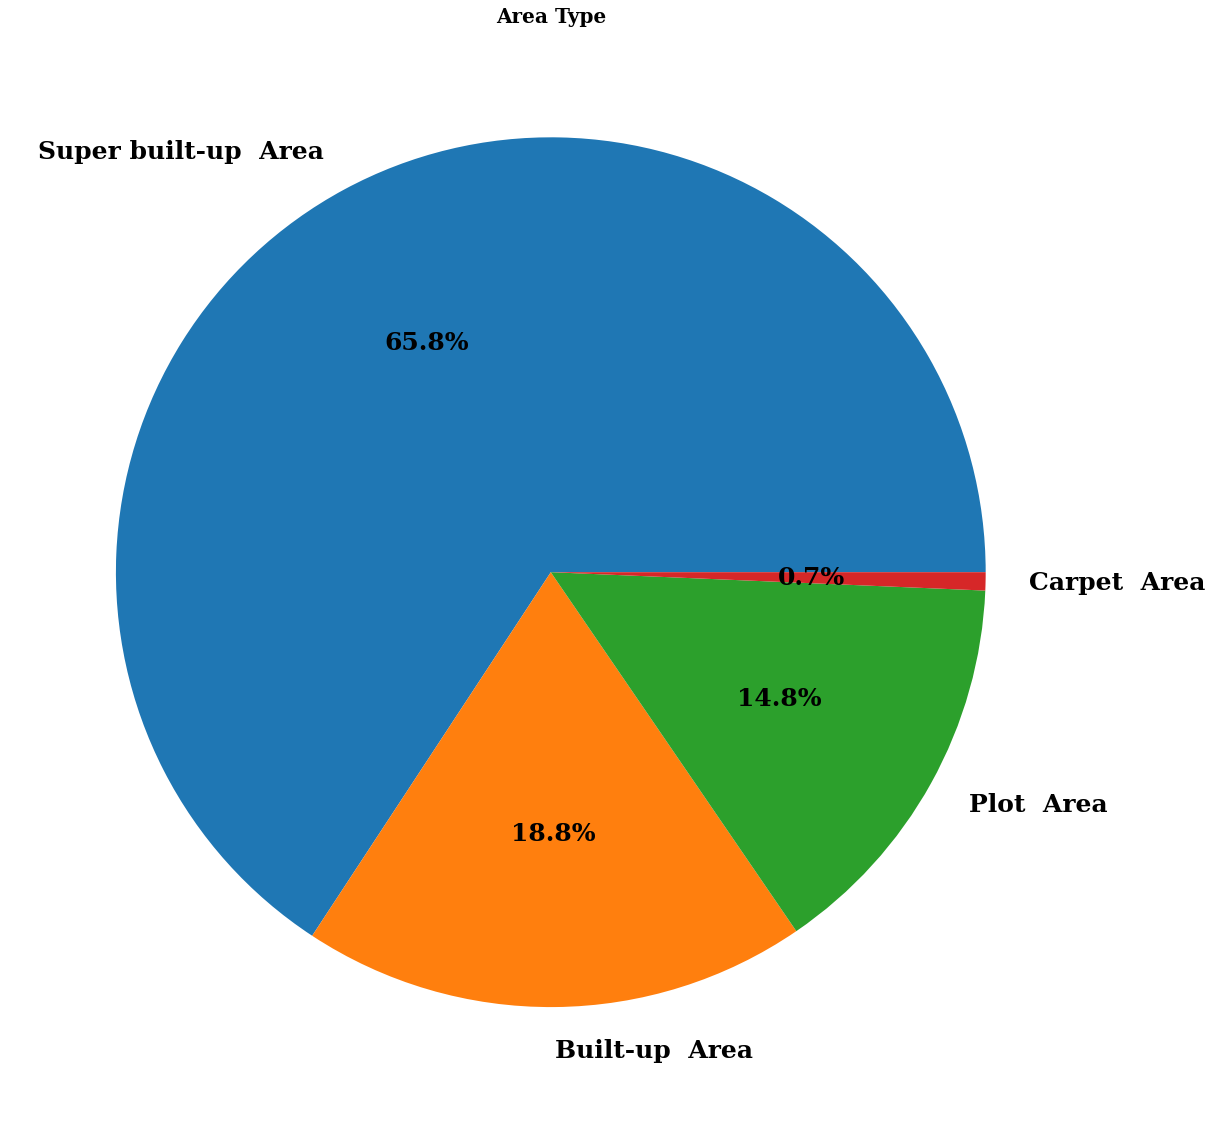

In [21]:
plt.figure(figsize=(30,20)) 
plt.pie(house_data['area_type'].value_counts(), labels=house_data['area_type'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Area Type', size=20, **hfont) 
plt.show()

In [22]:
house_data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [23]:
house_data['availability'].value_counts()

Ready To Move    9672
18-May            279
18-Dec            268
18-Apr            259
18-Aug            187
                 ... 
16-Nov              1
14-Nov              1
16-Jan              1
17-Feb              1
14-Jul              1
Name: availability, Length: 78, dtype: int64

In [24]:
house_data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
house_data['location'].value_counts()

Whitefield                 497
Sarjapur  Road             352
Electronic City            285
Kanakpura Road             238
Thanisandra                226
                          ... 
Rahat Bagh                   1
Jayamahal Extension          1
Hallehalli                   1
Nagarbhavi  BDA Complex      1
Abshot Layout                1
Name: location, Length: 1266, dtype: int64

In [26]:
house_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [27]:
house_data['size'].value_counts()

2 BHK         4884
3 BHK         3941
4 Bedroom      747
3 Bedroom      515
1 BHK          513
4 BHK          474
2 Bedroom      313
5 Bedroom      257
6 Bedroom      169
1 Bedroom      104
7 Bedroom       68
8 Bedroom       65
5 BHK           36
9 Bedroom       29
6 BHK           23
7 BHK           16
1 RK            13
9 BHK            5
8 BHK            3
10 Bedroom       3
11 Bedroom       2
11 BHK           1
27 BHK           1
43 Bedroom       1
14 BHK           1
12 Bedroom       1
13 BHK           1
Name: size, dtype: int64

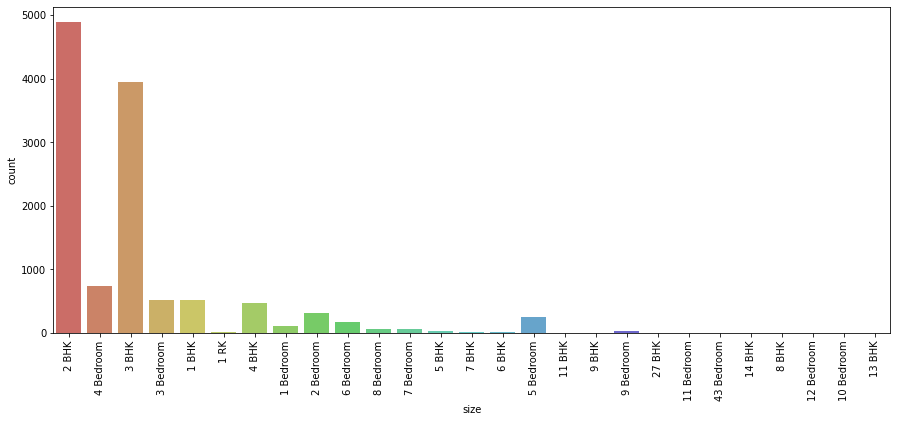

In [28]:
plt.figure(figsize=(15,6))
sns.countplot('size', data = house_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [29]:
house_data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [30]:
house_data['bath'].value_counts()

2.0     6472
3.0     3043
4.0     1080
1.0      760
5.0      427
6.0      242
7.0       82
8.0       42
9.0       26
10.0       6
27.0       1
11.0       1
12.0       1
40.0       1
15.0       1
13.0       1
Name: bath, dtype: int64

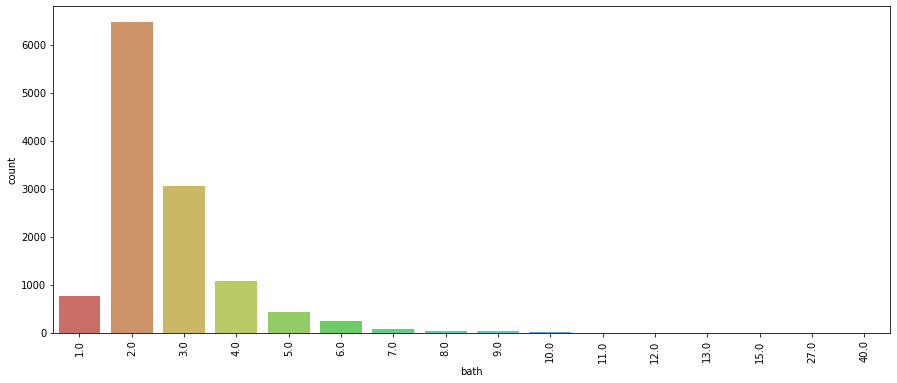

In [31]:
plt.figure(figsize=(15,6))
sns.countplot('bath', data = house_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

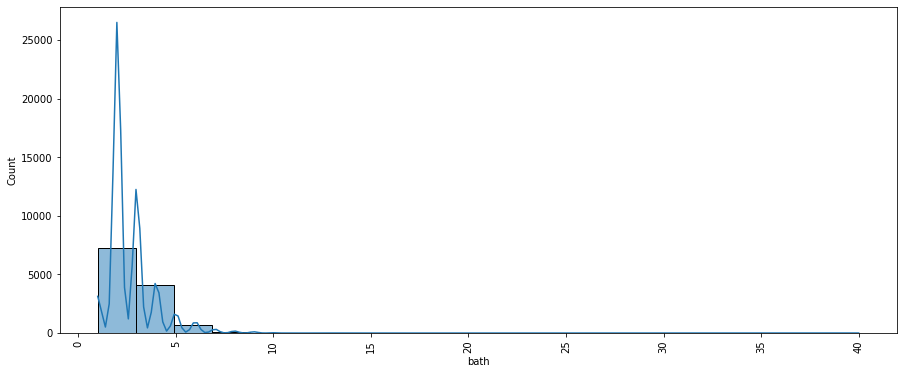

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(house_data['bath'], bins = 20, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [33]:
house_data['balcony'].unique()

array([1., 3., 2., 0.])

In [34]:
house_data['balcony'].value_counts()

2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: balcony, dtype: int64

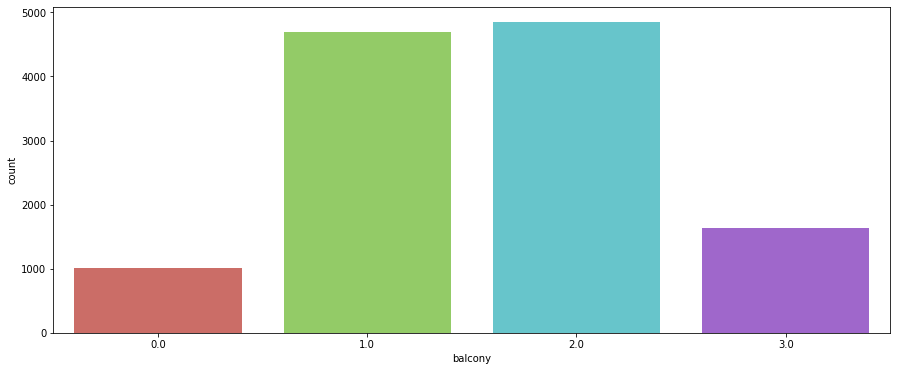

In [35]:
plt.figure(figsize=(15,6))
sns.countplot('balcony', data = house_data, palette='hls')
plt.show()

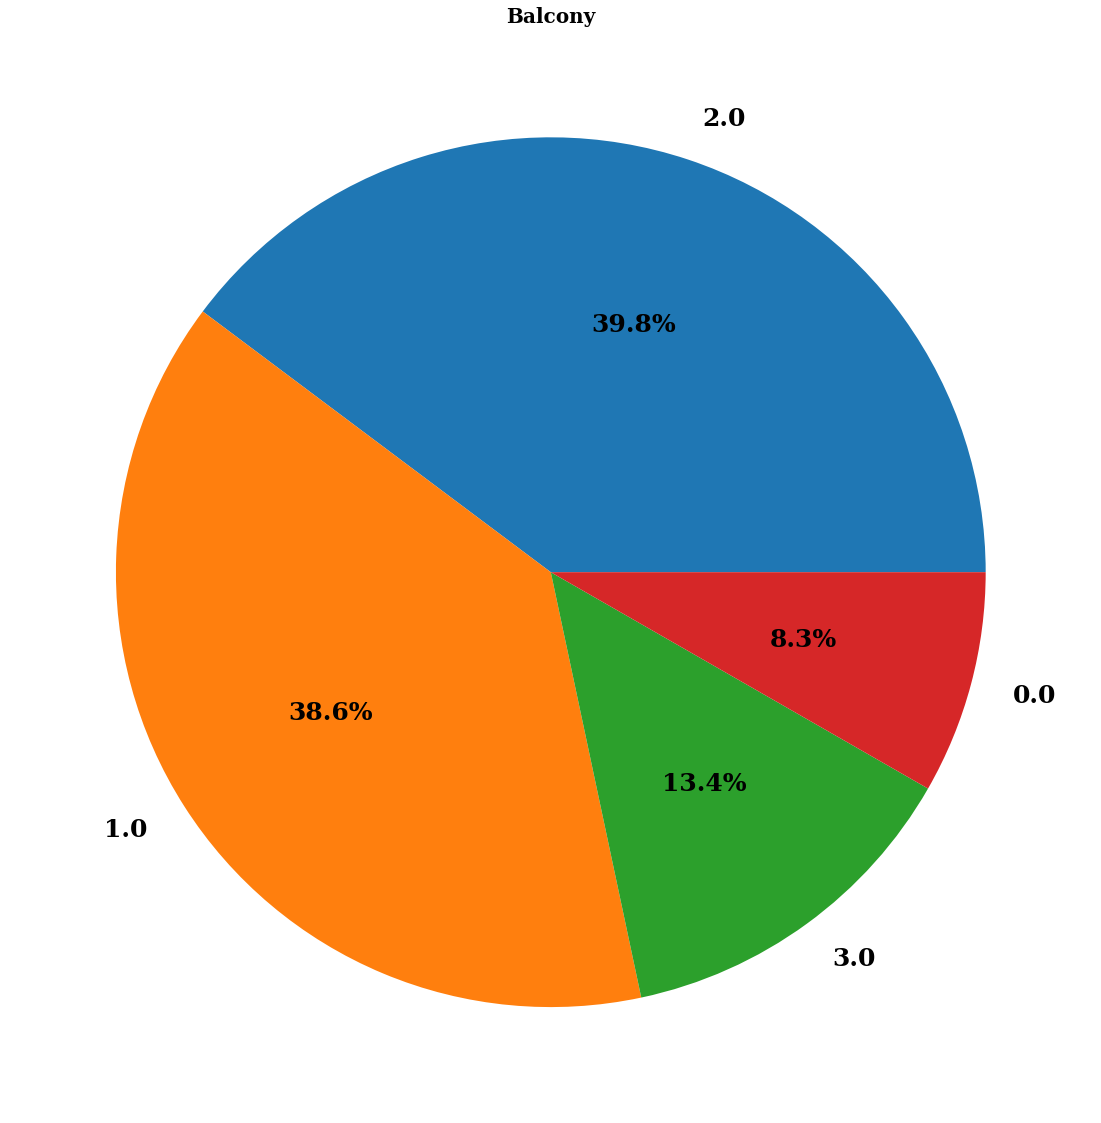

In [36]:
plt.figure(figsize=(30,20)) 
plt.pie(house_data['balcony'].value_counts(), labels=house_data['balcony'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Balcony', size=20, **hfont) 
plt.show()

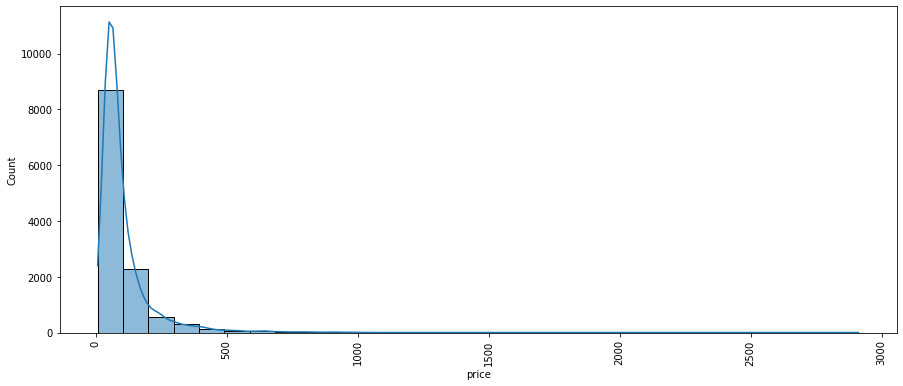

In [37]:
plt.figure(figsize=(15,6))
sns.histplot(house_data['price'], bins = 30, kde = True, palette='hls')
plt.xticks(rotation = 90)
plt.show()

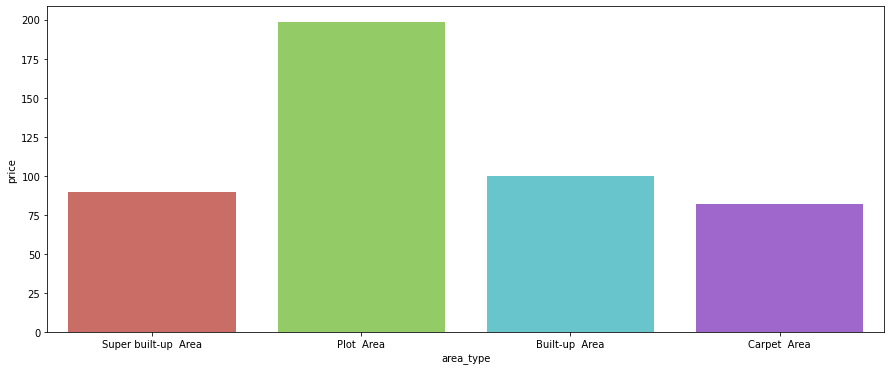

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'area_type', y = 'price', data = house_data, ci = None, palette='hls')
plt.show()

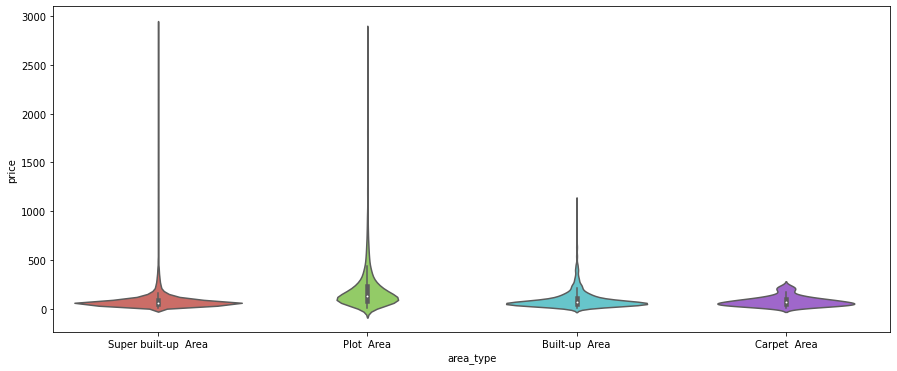

In [39]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'area_type', y = 'price', data = house_data, ci = None, palette='hls')
plt.show()

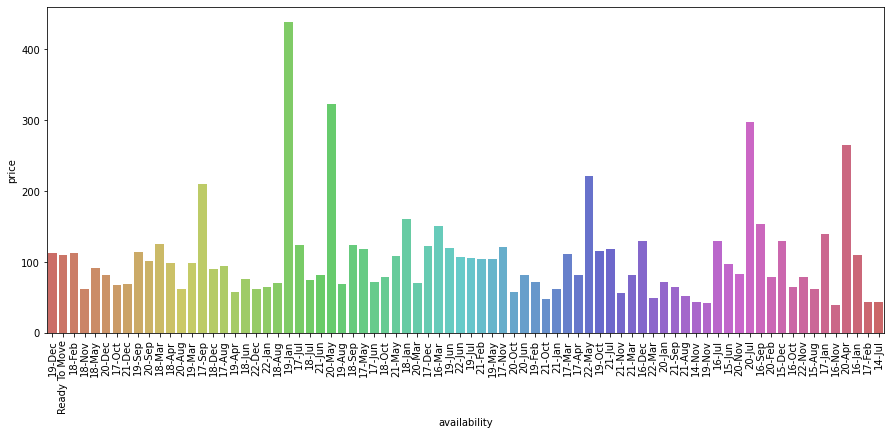

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'availability', y = 'price', data = house_data, ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

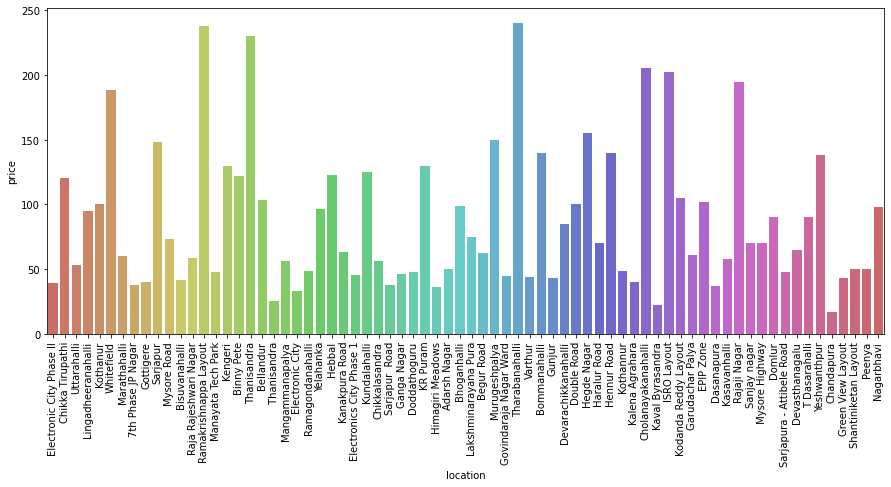

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'location', y = 'price', data = house_data.head(100), ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

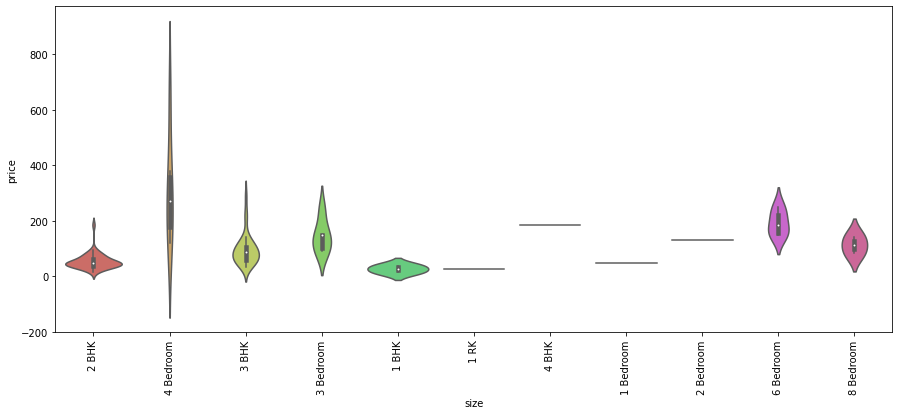

In [42]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'size', y = 'price', data = house_data.head(100), ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

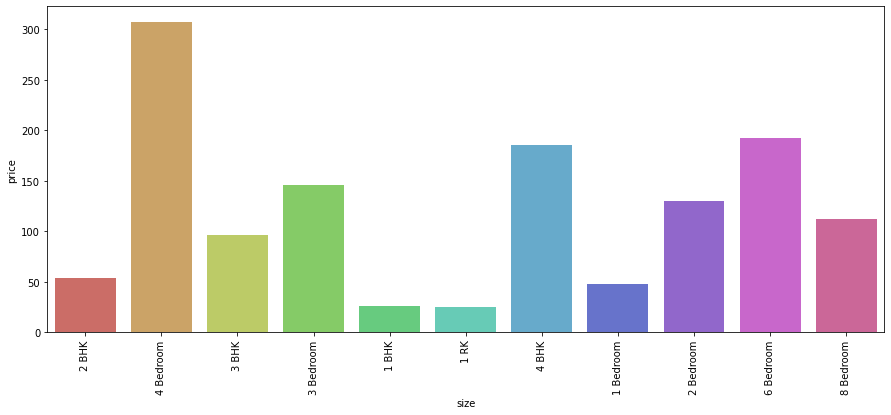

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'size', y = 'price', data = house_data.head(100), ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

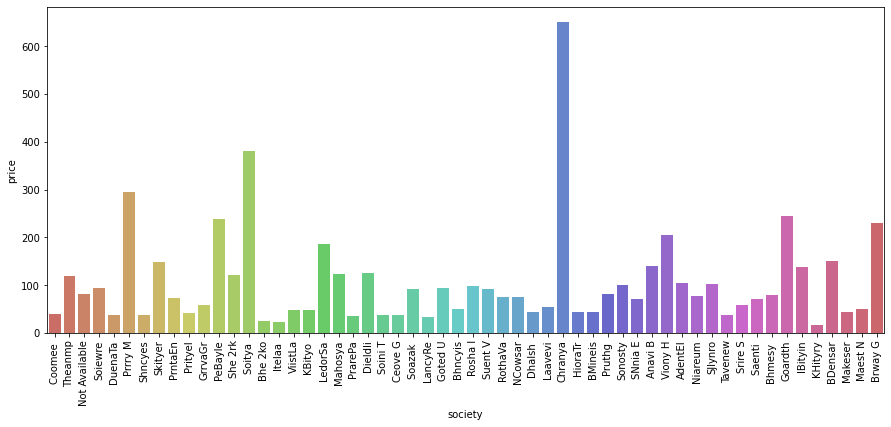

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'society', y = 'price', data = house_data.head(100), ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

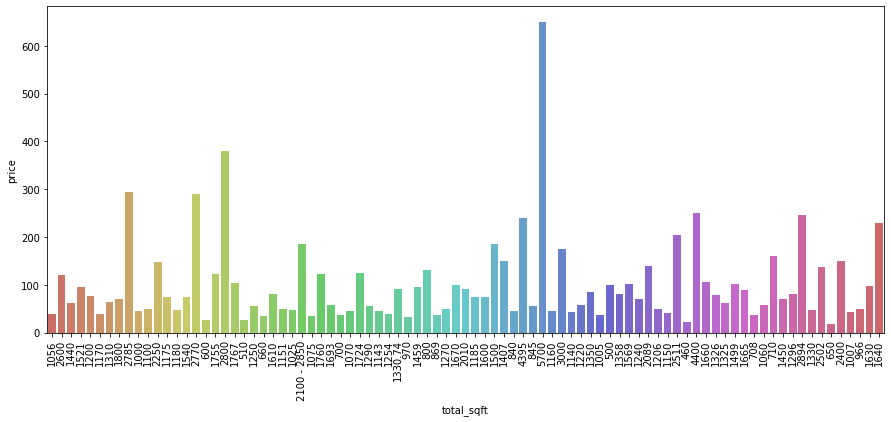

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'total_sqft', y = 'price', data = house_data.head(100), ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

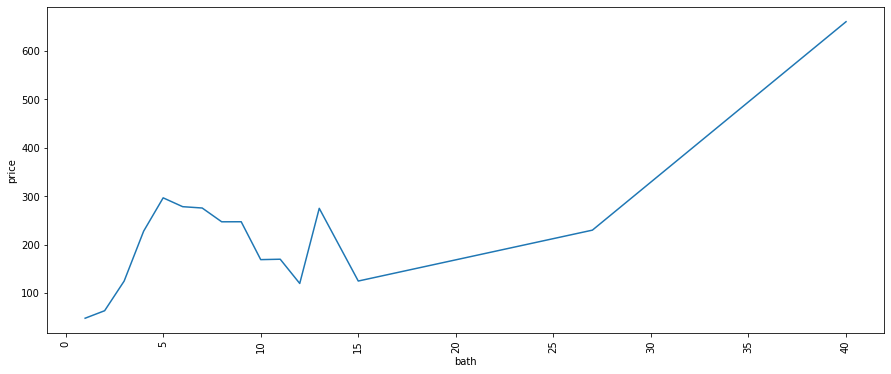

In [46]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'bath', y = 'price', data = house_data, ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

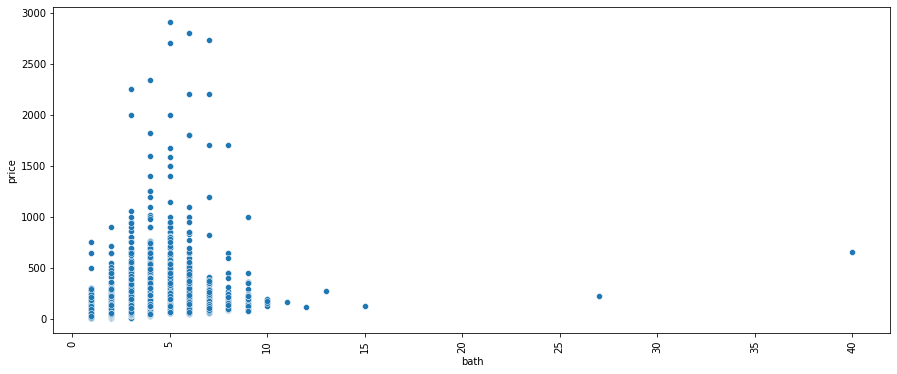

In [47]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'bath', y = 'price', data = house_data, ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

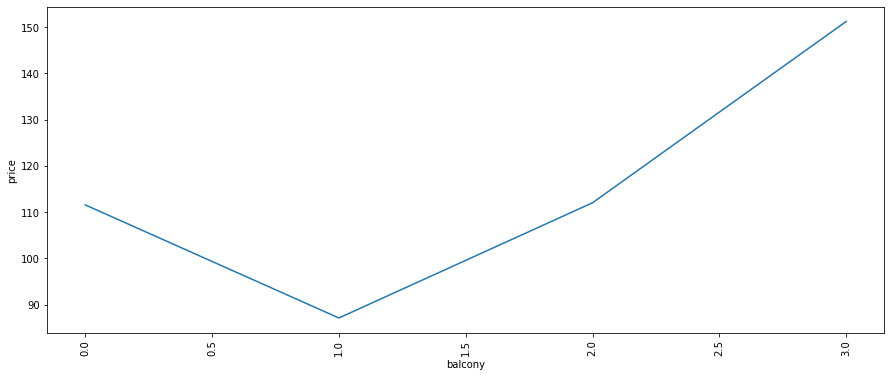

In [48]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'balcony', y = 'price', data = house_data, ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

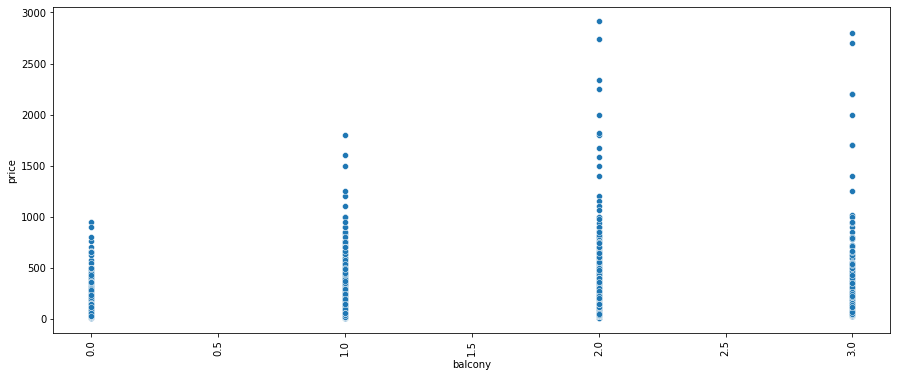

In [49]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'balcony', y = 'price', data = house_data, ci = None, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [50]:
house_data['BHK']=house_data['size'].apply(lambda x: int(x.split(' ')[0]))

In [51]:
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Not Available,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Not Available,1200,2.0,1.0,51.00,2


In [52]:
house_data['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [53]:
house_data['BHK'].value_counts()

2     5197
3     4456
4     1221
1      630
5      293
6      192
7       84
8       68
9       34
11       3
10       3
27       1
43       1
14       1
12       1
13       1
Name: BHK, dtype: int64

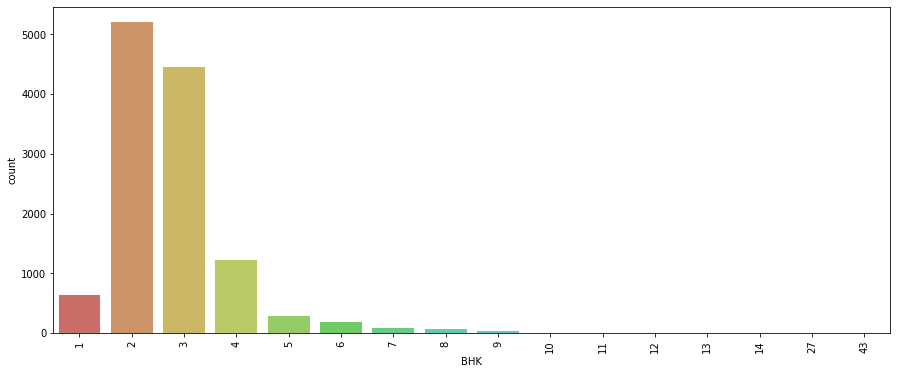

In [54]:
plt.figure(figsize=(15,6))
sns.countplot('BHK', data = house_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [55]:
house_data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [56]:
house_data['bath'].value_counts()

2.0     6472
3.0     3043
4.0     1080
1.0      760
5.0      427
6.0      242
7.0       82
8.0       42
9.0       26
10.0       6
27.0       1
11.0       1
12.0       1
40.0       1
15.0       1
13.0       1
Name: bath, dtype: int64

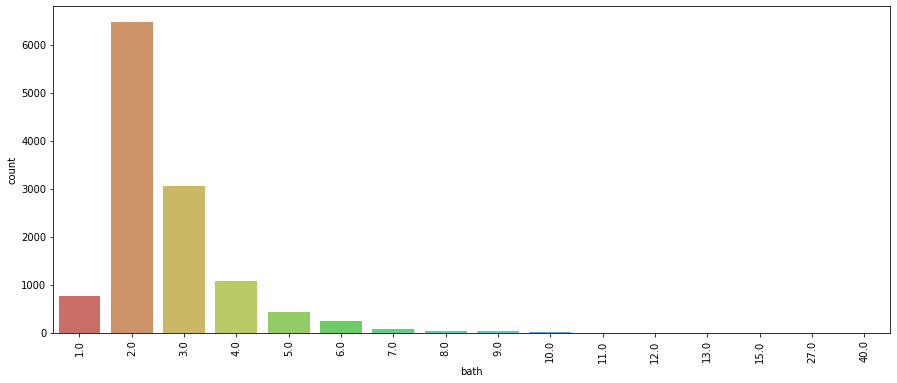

In [57]:
plt.figure(figsize=(15,6))
sns.countplot('bath', data = house_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [58]:
house_data[house_data.BHK>15]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,Not Available,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,Not Available,2400,40.0,0.0,660.0,43


In [59]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [60]:
house_data[~ house_data['total_sqft'].apply(isfloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...,...,...
12955,Super built-up Area,18-Nov,Thanisandra,3 BHK,Bhe 2ko,1437 - 1629,3.0,0.0,75.885,3
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,Bhath N,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,2


In [61]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [62]:
house_data=house_data.copy()
house_data['total_sqft']=house_data['total_sqft'].apply(convert_sqft_tonum)

In [63]:
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Not Available,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Not Available,1200.0,2.0,1.0,51.00,2


In [64]:
house_data.loc[20]

area_type       Built-up  Area
availability     Ready To Move
location               Kengeri
size                     1 BHK
society          Not Available
total_sqft               600.0
bath                       1.0
balcony                    1.0
price                     15.0
BHK                          1
Name: 20, dtype: object

In [65]:
data1=house_data.copy()
data1['price_per_sqft']=data1['price']*1000000/data1['total_sqft']
data1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,46153.846154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Not Available,1440.0,2.0,3.0,62.00,3,43055.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,62458.908613
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Not Available,1200.0,2.0,1.0,51.00,2,42500.000000


In [66]:
len(data1.location.unique())

1266

In [67]:
data1.location=data1.location.apply(lambda x: x.strip())
location_stats=data1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              498
Sarjapur  Road          352
Electronic City         287
Kanakpura Road          238
Thanisandra             229
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1255, dtype: int64

In [68]:
len(location_stats[location_stats<=10])

1028

In [69]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
Gunjur Palya            10
HAL 2nd Stage           10
Ganga Nagar             10
Pattandur Agrahara      10
Narayanapura            10
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1028, dtype: int64

In [70]:
len(data1.location.unique())

1255

In [71]:
data1.location=data1.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data1.location.unique())

228

In [72]:
data1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,46153.846154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Not Available,1440.0,2.0,3.0,62.00,3,43055.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,62458.908613
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Not Available,1200.0,2.0,1.0,51.00,2,42500.000000


In [73]:
data1[data1.total_sqft/data1.BHK<300].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,Not Available,1407.0,4.0,1.0,150.0,6,106609.808102
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,Not Available,1350.0,7.0,0.0,85.0,8,62962.962963
70,Plot Area,Ready To Move,other,3 Bedroom,Not Available,500.0,3.0,2.0,100.0,3,200000.000000
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,Not Available,460.0,1.0,0.0,22.0,2,47826.086957
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,Not Available,710.0,6.0,3.0,160.0,6,225352.112676


In [74]:
data2=data1[~(data1.total_sqft/data1.BHK<300)]
data2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,46153.846154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Not Available,1440.0,2.0,3.0,62.00,3,43055.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,62458.908613
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Not Available,1200.0,2.0,1.0,51.00,2,42500.000000


In [75]:
data2.shape

(11541, 11)

In [76]:
data2["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count      11499.000000
mean       62636.309923
std        40484.385889
min         2678.298133
25%        42270.384255
50%        52910.052910
75%        68750.000000
max      1764705.882353
Name: price_per_sqft, dtype: object

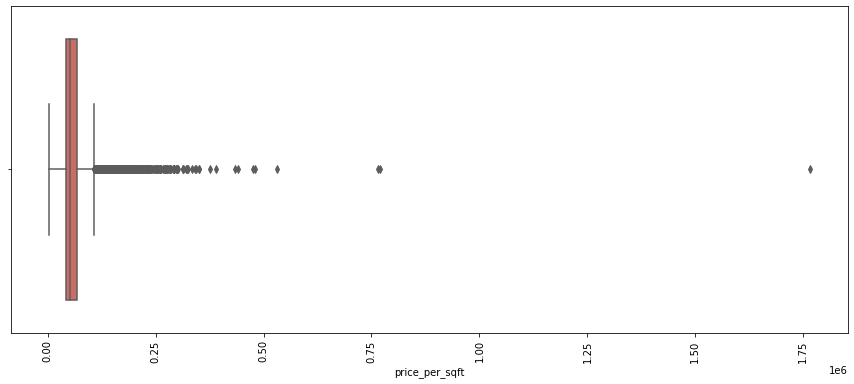

In [77]:
plt.figure(figsize=(15,6))
sns.boxplot('price_per_sqft', data = data2, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [78]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3=remove_pps_outliers(data2)
data3.shape

(9434, 11)

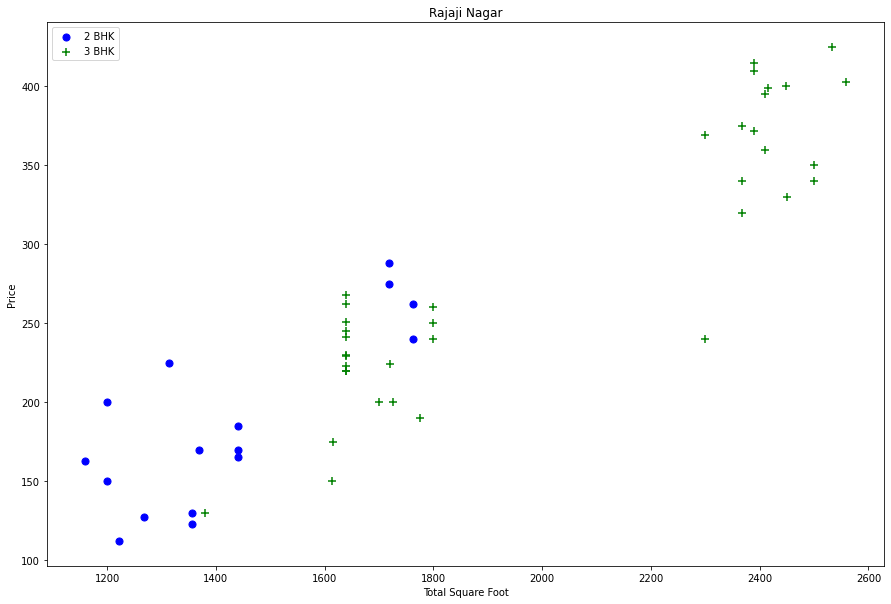

In [79]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Rajaji Nagar")

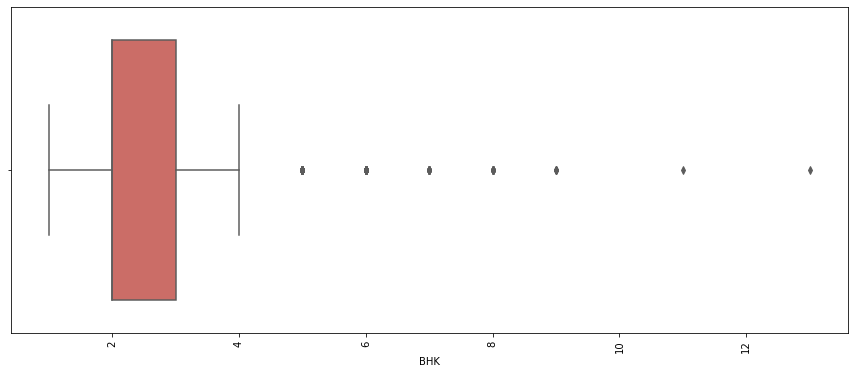

In [80]:
plt.figure(figsize=(15,6))
sns.boxplot('BHK', data = data3, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [81]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data4=remove_bhk_outliers(data3)
data4.shape

(6689, 11)

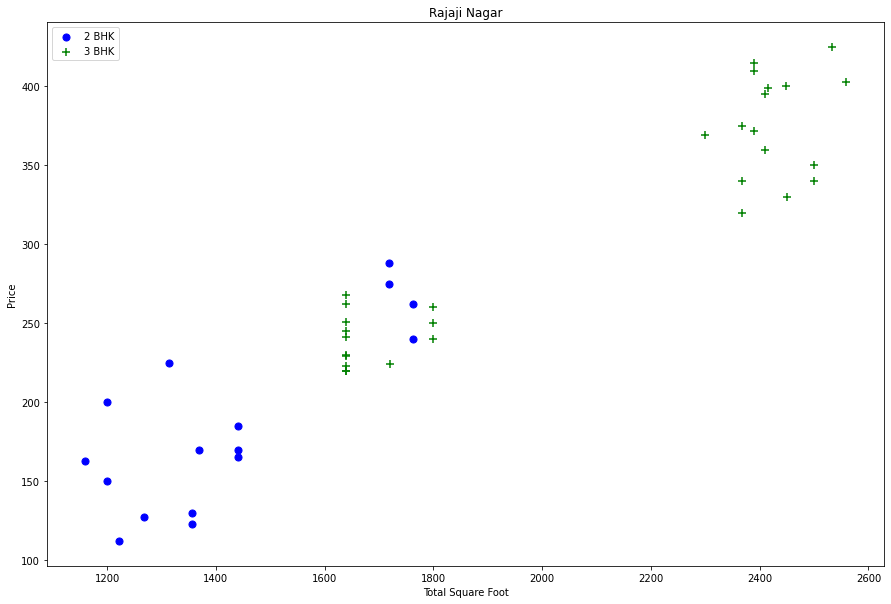

In [82]:
plot_scatter_chart(data4,"Rajaji Nagar")

Text(0, 0.5, 'Count')

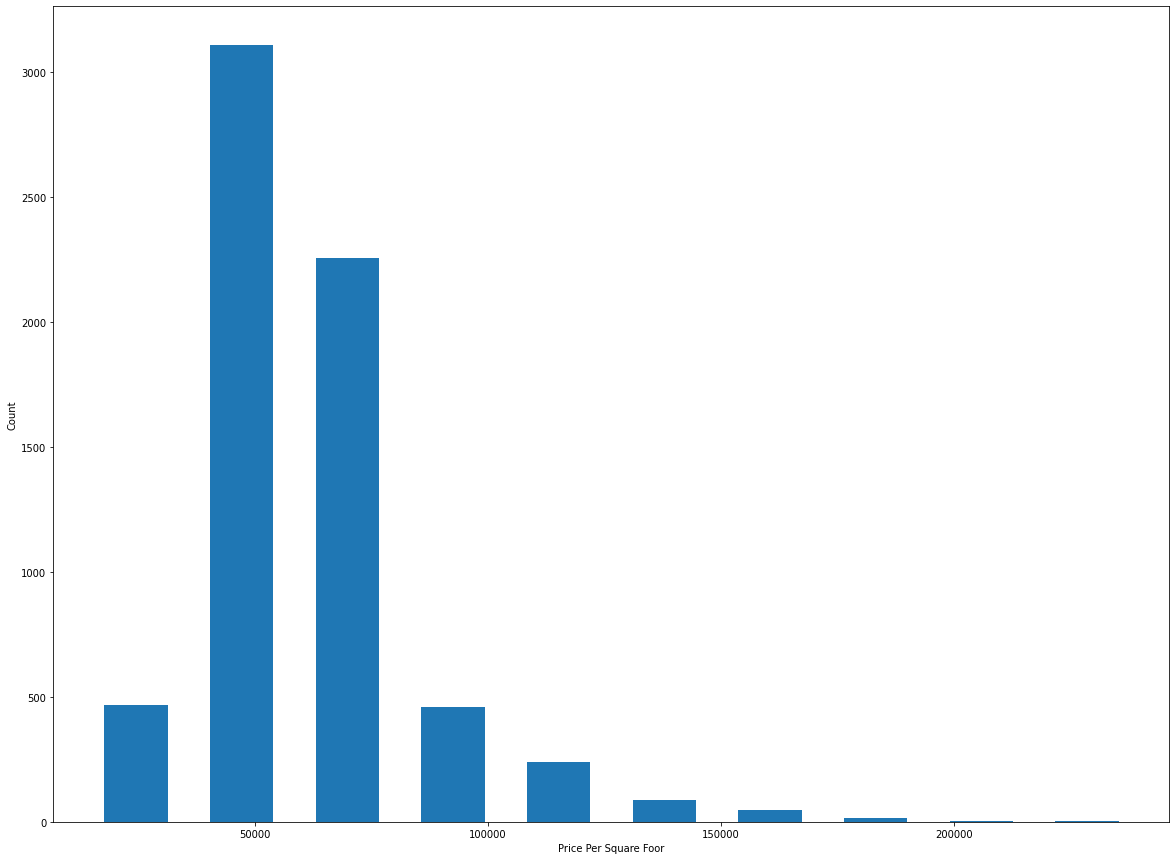

In [83]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

In [84]:
data4.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [85]:
data4[data4.bath>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
8857,Super built-up Area,Ready To Move,other,13 BHK,Not Available,5425.0,13.0,0.0,275.0,13,50691.24424


Text(0, 0.5, 'Count')

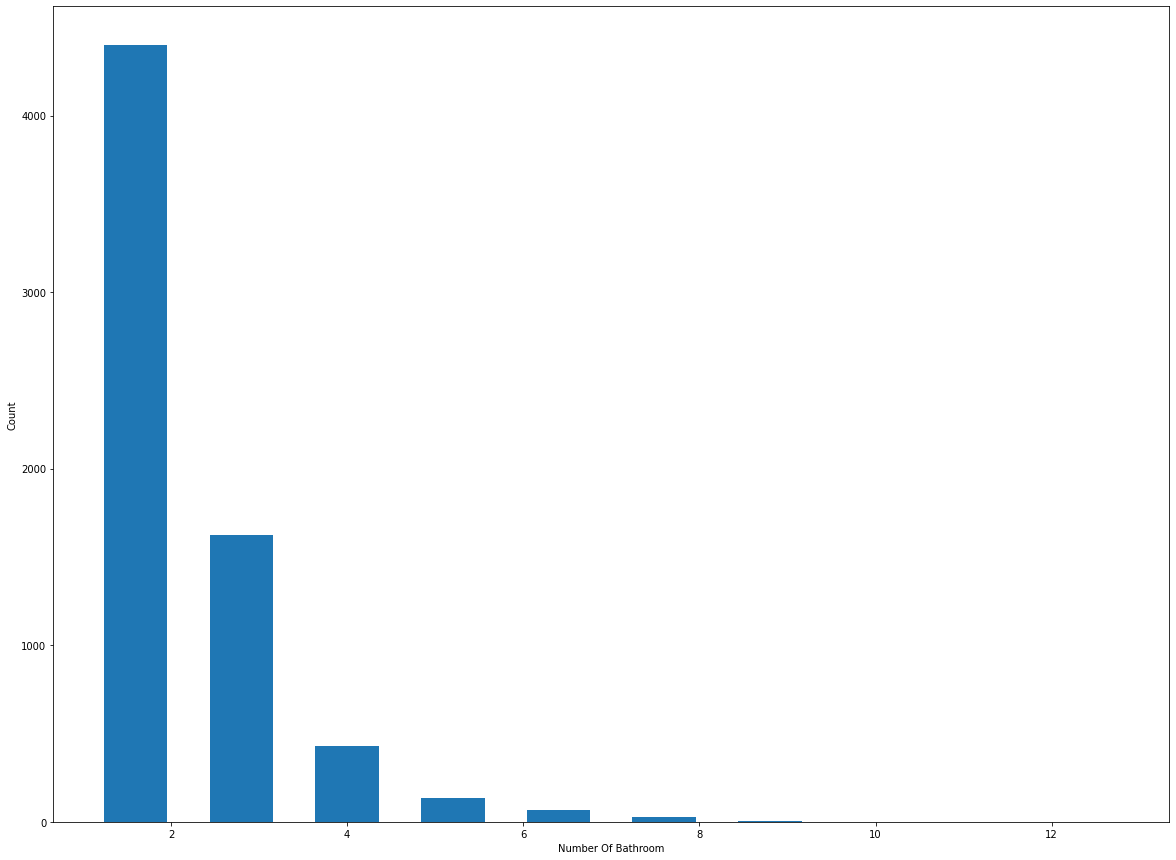

In [86]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [87]:
data4[data4.bath>data4.BHK+2]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
1433,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,Not Available,2460.0,7.0,2.0,80.0,4,32520.325203
6054,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,1806.0,6.0,2.0,116.0,3,64230.343300
7643,Super built-up Area,Ready To Move,other,6 BHK,Prowshi,11338.0,9.0,1.0,1000.0,6,88198.976892


In [88]:
data5=data4[data4.bath<data4.BHK+2]
data5.shape

(6621, 11)

In [89]:
data6=data5.drop(['size','price_per_sqft'],axis='columns')
data6

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,20-May,1st Block Jayanagar,Not Available,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,Not Available,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,Not Available,1875.0,2.0,3.0,235.0,3
3,Built-up Area,15-Dec,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,18-Jun,1st Block Jayanagar,Not Available,1235.0,2.0,2.0,148.0,2
...,...,...,...,...,...,...,...,...,...
9421,Built-up Area,Ready To Move,other,NantsGa,1650.0,1.0,1.0,130.0,2
9425,Super built-up Area,Ready To Move,other,MJarlPe,1155.0,2.0,1.0,64.0,2
9427,Carpet Area,19-Jan,other,Not Available,1200.0,2.0,3.0,70.0,2
9428,Super built-up Area,Ready To Move,other,Not Available,1800.0,1.0,1.0,200.0,1


In [90]:
dummies=pd.get_dummies(data6.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data7=pd.concat([data6,dummies.drop('other',axis='columns')],axis='columns')
data7.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,1st Block Jayanagar,Not Available,2850.0,4.0,1.0,428.0,4,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,1st Block Jayanagar,Not Available,1630.0,3.0,2.0,194.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,Not Available,1875.0,2.0,3.0,235.0,3,1,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,15-Dec,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-Jun,1st Block Jayanagar,Not Available,1235.0,2.0,2.0,148.0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
data8=data7.drop('location',axis='columns')
data8.head()

,area_type,availability,society,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,Not Available,2850.0,4.0,1.0,428.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,Not Available,1630.0,3.0,2.0,194.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Not Available,1875.0,2.0,3.0,235.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,15-Dec,Bhsic C,1200.0,2.0,0.0,130.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-Jun,Not Available,1235.0,2.0,2.0,148.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
data8.shape

(6621, 235)

In [94]:
X=data8.drop('price',axis='columns')
X.head()

,area_type,availability,society,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,Not Available,2850.0,4.0,1.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,Not Available,1630.0,3.0,2.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Not Available,1875.0,2.0,3.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,15-Dec,Bhsic C,1200.0,2.0,0.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-Jun,Not Available,1235.0,2.0,2.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
y=data8.price

In [96]:
X_train = X.iloc[:5802]

In [97]:
y_train = y.iloc[:5802]

In [98]:
X_test = X.iloc[5802:7252]

In [99]:
y_test = y.iloc[5802:7252]

In [100]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Super built-up  Area'

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, 
                           cv=cv)

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

In [ ]:
def price_predict(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [ ]:
price_predict('1st Phase JP Nagar',1000,2,2)

In [ ]:
price_predict('1st Phase JP Nagar',1000,2,3)

In [ ]:
price_predict('5th Phase JP Nagar',1000,2,2)

In [ ]:
price_predict('Indira Nagar',1000,2,2)